In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Load the dataset
df = pd.read_csv("student_pass_fail.csv")

# Display first 5 rows
df.head()


,Study Hours,Attendance,Pass
0,11.5,78.6,0
1,9.6,80.6,0
2,11.9,85.8,0
3,14.6,85.5,1
4,9.3,61.2,0


In [3]:
# Basic info
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Statistical summary
df.describe()


Shape of dataset: (200, 3)

Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64


,Study Hours,Attendance,Pass
count,200.000000,200.000000,200.000000
mean,9.878000,75.789000,0.155000
std,2.795656,9.654055,0.362813
min,2.100000,42.600000,0.000000
25%,7.900000,68.950000,0.000000
50%,10.000000,75.800000,0.000000
75%,11.500000,81.900000,0.000000
max,18.200000,100.000000,1.000000


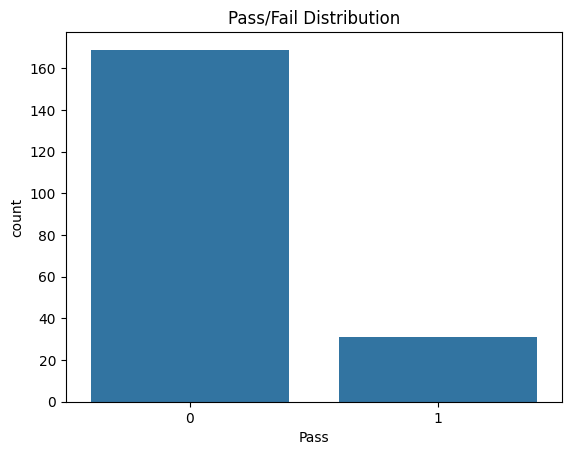

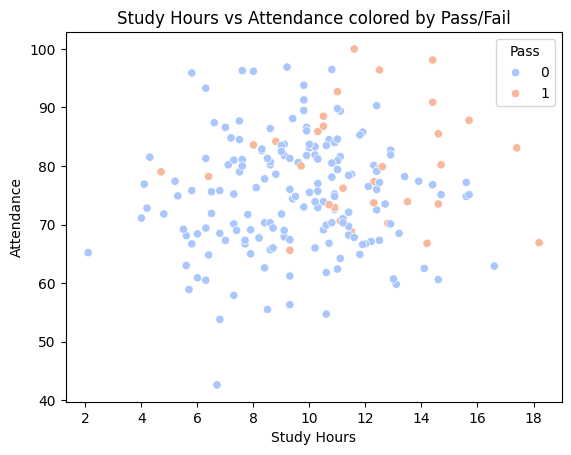

In [4]:
# Distribution of Pass/Fail
sns.countplot(data=df, x="Pass")
plt.title("Pass/Fail Distribution")
plt.show()

# Scatter plot: Study Hours vs Attendance
sns.scatterplot(data=df, x="Study Hours", y="Attendance", hue="Pass", palette="coolwarm")
plt.title("Study Hours vs Attendance colored by Pass/Fail")
plt.show()


In [5]:
# Features and Target
X = df[["Study Hours", "Attendance"]]
y = df["Pass"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


Accuracy: 0.88


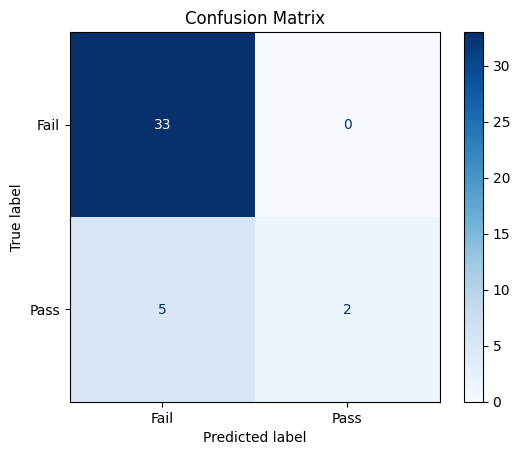

In [7]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [8]:
# Model coefficients and insights
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
print("Feature Importance:\n", coefficients)

# Optional: View predicted probabilities
df_test = X_test.copy()
df_test["Actual"] = y_test.values
df_test["Predicted"] = y_pred
df_test["Probability"] = model.predict_proba(X_test)[:, 1]
df_test.head()


Feature Importance:
        Feature  Coefficient
0  Study Hours     0.400873
1   Attendance     0.066043


,Study Hours,Attendance,Actual,Predicted,Probability
95,5.6,68.1,0,0,0.011501
15,8.3,82.6,0,0,0.082129
30,8.2,67.7,0,0,0.031132
158,6.4,78.2,1,0,0.030295
128,10.3,81.2,0,0,0.153881
